## pop3_unibivar

### Imports libraries and load csv

In [1]:
# google drive folder access
# from google.colab import drive
# drive.mount("/content/drive", force_remount=True)

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sns.set(style="ticks")
sns.set(style="white")
sns.set_palette("GnBu_d")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Table df_joined.csv
path_df = "./datas/pop3_df_base.csv"
df_base = pd.read_csv(path_df, sep=',', error_bad_lines=False, index_col=0)

### Functions

In [2]:
def description_indiv(df, var_name, old_categ, new_categ, fig_w, fig_h, x_label, y_label, angle=45):

  df_base['ID'] = df_base.index
  # répartition
  data = df.groupby([var_name])['ID'].agg(['count'])
  # total individus
  total = data['count'].sum()
  # calcul pourcentages
  data['percent'] = data['count'].apply(lambda x: 100 * x / total)

  # reset index
  data.reset_index(inplace=True)
  data[var_name] = data[var_name].astype(int).astype(str)
  # labels replace
  data[var_name].replace(to_replace=old_categ, value=new_categ, inplace=True)

  # Initialize the matplotlib figure
  f, ax = plt.subplots(figsize=(fig_w, fig_h))
  sns.despine(left=True, offset=5);

  # barplot
  sns.barplot(x=var_name, y="percent", data=data[[var_name,'percent']], orient='v')
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  plt.xticks(rotation=angle)

  # display values on bars
  for index, row in data.iterrows():
    ax.text(row.name,row.percent +1, round(row.percent,2), color='black', ha="center")

def df_base_disp(columns_names, fig_w, fig_h):

  fig_dims = (fig_w, fig_h)
  nb_plots = len(columns_names)
  fig, axs = plt.subplots(ncols=nb_plots, figsize=fig_dims)
  skewValue = 0
  kurtosis = 0

  for i, name in enumerate(columns_names):
    # print(i, name)
    x_data =  df_base[name]
    # skewvalue
    skewValue = x_data.skew()
    # kurtosis
    kurtosis = x_data.kurtosis()
    disp = "Skew: %0.3f - kurtosis: %0.3f" % (skewValue, kurtosis)
    # print(disp)

    # plot
    # ax = sns.kdeplot(x_data, shade=True, ax=axs[i])
    ax = sns.distplot(x_data, ax=axs[i])
    # add text annotation
    ax.set_title(disp)


def df_base_dispersion(column_data):
  x = column_data

  # skewvalue
  skewValue = x.skew()
  disp = "Skew: %0.3f" % skewValue

  # plot
  sns.kdeplot(x, shade=True);
  plt.xlabel(disp)


def boxplot(df, x_categ, y_quantiv, old_categ, new_categ, fig_w, fig_h, x_label, y_label, angle=45):

  # deactivate warning
  pd.set_option('mode.chained_assignment', None)

  #  get data
  data_f = df[[x_categ, y_quantiv]]
  # cast to str
  data_f.loc[:,x_categ] = data_f.loc[:,x_categ].astype(int).astype(str)
  # labels replace
  data_f[x_categ].replace(to_replace=old_categ, value=new_categ, inplace=True)

  # Initialize the matplotlib figure
  sns.set(style="whitegrid")
  sns.set_palette("GnBu_d")
  f, ax = plt.subplots(figsize=(fig_w, fig_h))
  sns.despine(left=True, offset=5);

  # boxplot
  ax = sns.boxplot(x=x_categ, y=y_quantiv, data=data_f)
  ax.set_xlabel(x_label)
  ax.set_ylabel(y_label)
  plt.xticks(rotation=angle)

### Verification datas

In [3]:
print('df_base.shape :', df_base.shape)
print("Total missing values = ", df_base.isna().sum().sum())
df_base[['tage_PS', 'revenu', 'imc', 'pain_cereales', 'fruits_legumes', 'produits_laitiers', 
         'viandes_poissons_oeufs', 'produits_sucres', 'eau', 'alcool']].describe()

df_base.shape : (2121, 15)
Total missing values =  0


,tage_PS,revenu,imc,pain_cereales,fruits_legumes,produits_laitiers,viandes_poissons_oeufs,produits_sucres,eau,alcool
count,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000,2121.000000
mean,7.871759,8.571429,25.768907,114.817111,157.652167,177.531658,57.376445,84.080052,912.271482,184.590626
std,0.770664,3.590831,4.812153,88.125929,116.004836,144.294283,48.907099,63.100138,579.819760,226.407082
min,7.000000,1.000000,15.776830,0.535714,1.010000,1.442857,0.128143,1.428572,6.696428,0.735714
25%,7.000000,6.000000,22.321428,52.540625,74.000000,89.285713,23.107144,41.321426,482.991090,102.973230
50%,8.000000,9.000000,25.050505,96.244995,140.375007,149.958043,51.785294,72.024956,815.714330,133.078422
75%,8.000000,12.000000,28.405504,152.250000,211.428570,209.748810,73.528908,108.571423,1222.499996,175.714280
max,9.000000,13.000000,50.117188,644.872680,962.928590,2007.288030,400.714290,447.674010,3896.473400,6209.856900


In [4]:
df_base.head()

,NOIND,agglo_5cl,sex_PS,tage_PS,diplome_interv,revenu,imc,fume,pain_cereales,fruits_legumes,produits_laitiers,viandes_poissons_oeufs,produits_sucres,eau,alcool
0,110100101,1,1,7,3.0,12,18.282312,0.0,60.899998,42.166668,291.533327,87.446669,41.333332,544.16669,133.078422
1,110100701,1,2,8,3.0,11,23.624619,0.0,24.000000,234.600010,205.357150,1.732143,126.500004,1027.14280,5.771429
2,110100801,1,1,8,3.0,11,29.949701,1.0,70.349998,63.285717,130.742860,63.482145,118.571420,892.85714,133.078422
3,110101201,1,1,8,6.0,11,26.141914,0.0,9.900001,258.714290,8.000000,69.600006,130.714280,1160.26788,866.714290
4,110101401,1,2,9,3.0,6,22.420361,0.0,46.618332,61.333332,250.000000,24.381808,64.666664,295.83333,133.078422


In [5]:
print(list(df_base))

['NOIND', 'agglo_5cl', 'sex_PS', 'tage_PS', 'diplome_interv', 'revenu', 'imc', 'fume', 'pain_cereales', 'fruits_legumes', 'produits_laitiers', 'viandes_poissons_oeufs', 'produits_sucres', 'eau', 'alcool']


### Describe

In [6]:
df_base[['imc', 'pain_cereales', 'fruits_legumes', 'produits_laitiers']].describe()

,imc,pain_cereales,fruits_legumes,produits_laitiers
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,25.768907,114.817111,157.652167,177.531658
std,4.812153,88.125929,116.004836,144.294283
min,15.776830,0.535714,1.010000,1.442857
25%,22.321428,52.540625,74.000000,89.285713
50%,25.050505,96.244995,140.375007,149.958043
75%,28.405504,152.250000,211.428570,209.748810
max,50.117188,644.872680,962.928590,2007.288030


In [7]:
print(df_base[['imc', 'pain_cereales', 'fruits_legumes', 'viandes_poissons_oeufs']].describe())

               imc  pain_cereales  fruits_legumes  viandes_poissons_oeufs
count  2121.000000    2121.000000     2121.000000             2121.000000
mean     25.768907     114.817111      157.652167               57.376445
std       4.812153      88.125929      116.004836               48.907099
min      15.776830       0.535714        1.010000                0.128143
25%      22.321428      52.540625       74.000000               23.107144
50%      25.050505      96.244995      140.375007               51.785294
75%      28.405504     152.250000      211.428570               73.528908
max      50.117188     644.872680      962.928590              400.714290


In [8]:
df_base[['viandes_poissons_oeufs', 'produits_sucres', 'eau', 'alcool']].describe()

,viandes_poissons_oeufs,produits_sucres,eau,alcool
count,2121.000000,2121.000000,2121.000000,2121.000000
mean,57.376445,84.080052,912.271482,184.590626
std,48.907099,63.100138,579.819760,226.407082
min,0.128143,1.428572,6.696428,0.735714
25%,23.107144,41.321426,482.991090,102.973230
50%,51.785294,72.024956,815.714330,133.078422
75%,73.528908,108.571423,1222.499996,175.714280
max,400.714290,447.674010,3896.473400,6209.856900


In [9]:
print(df_base[['produits_laitiers', 'produits_sucres', 'eau', 'alcool']].describe())

       produits_laitiers  produits_sucres          eau       alcool
count        2121.000000      2121.000000  2121.000000  2121.000000
mean          177.531658        84.080052   912.271482   184.590626
std           144.294283        63.100138   579.819760   226.407082
min             1.442857         1.428572     6.696428     0.735714
25%            89.285713        41.321426   482.991090   102.973230
50%           149.958043        72.024956   815.714330   133.078422
75%           209.748810       108.571423  1222.499996   175.714280
max          2007.288030       447.674010  3896.473400  6209.856900


## Univar

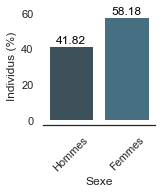

In [10]:
description_indiv(df_base, 'sex_PS', ['1', '2'], ['Hommes', 'Femmes'], 2, 2, 'Sexe', 'Individus (%)', 45)

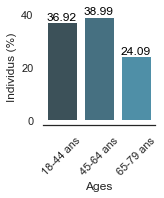

In [11]:
# variable 'tage_PS'
description_indiv(df_base, 'tage_PS', \
                  ['1', '2', '3', '4', '5', '6', '7', '8', '9'], \
                  ['0-11 mois', '1-3 ans', '4-6 ans', '7-10 ans', '11-14 ans', '15-17 ans', '18-44 ans', '45-64 ans', '65-79 ans'], \
                  2, 2, 'Ages', 'Individus (%)', 45)

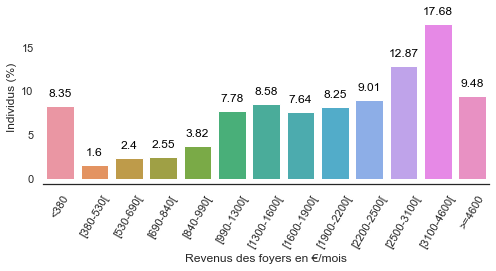

In [12]:
# variable 'revenu'
description_indiv(df_base, 'revenu', \
                  ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'], \
                  ['<380', '[380-530[', '[530-690[', '[690-840[', '[840-990[', \
                   '[990-1300[', '[1300-1600[', '[1600-1900[', '[1900-2200[', \
                   '[2200-2500[', '[2500-3100[', '[3100-4600[', '>=4600'], \
                  8, 3, 'Revenus des foyers en €/mois', 'Individus (%)', 60)

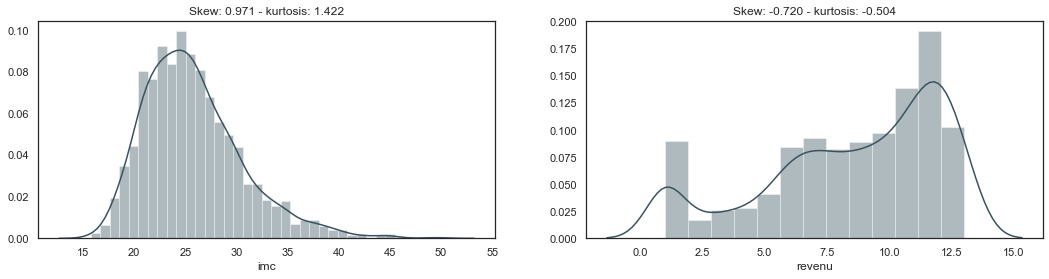

In [13]:
df_base_disp(['imc', 'revenu'], 18, 4)

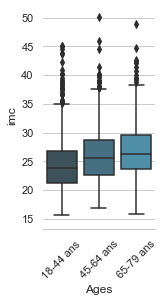

In [14]:
# variables tage_PS & imc
boxplot(df_base, 'tage_PS', 'imc', ['7','8', '9'], ['18-44 ans', '45-64 ans', '65-79 ans'], 2, 4, 'Ages', 'imc', angle=45)

## Bivariée

In [15]:
print(list(df_base))

['NOIND', 'agglo_5cl', 'sex_PS', 'tage_PS', 'diplome_interv', 'revenu', 'imc', 'fume', 'pain_cereales', 'fruits_legumes', 'produits_laitiers', 'viandes_poissons_oeufs', 'produits_sucres', 'eau', 'alcool', 'ID']


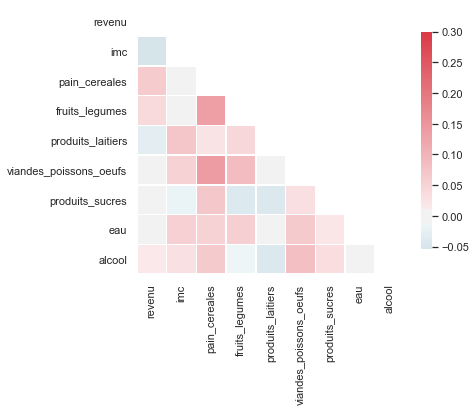

In [16]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html

sns.set(style="white")
# sns.set_palette("GnBu_d")

selected_columns = ['revenu', 'imc', 'pain_cereales', 'fruits_legumes', 'produits_laitiers', 
                    'viandes_poissons_oeufs', 'produits_sucres', 'eau', 'alcool']

# Generate dataset
d = pd.DataFrame(data=df_base[selected_columns].values, columns=selected_columns)

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})